In [56]:

import quandl
# pandas for data manipulation
import pandas as pd
quandl.ApiConfig.api_key = 'xJBEiGRBL_Efp4vT_Wk5'
# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')
# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


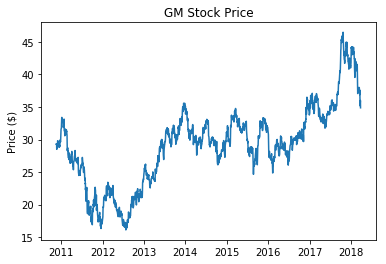

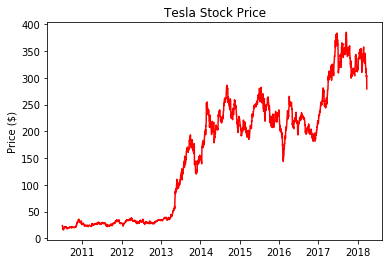

In [37]:
import matplotlib.pyplot as plt

# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)');
plt.show()
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)');
plt.show();

In [34]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}
# Create a year column 
tesla['Year'] = tesla.index.year
# Take Dates from index and move to Date column 
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0
# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.ix[i, 'cap'] = shares * tesla.ix[i, 'Adj. Close']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [35]:
cars = gm.merge(tesla, how='inner', on='Date')
cars

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,...,Volume_y,Ex-Dividend_y,Split Ratio_y,Adj. Open_y,Adj. High_y,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Year,cap
0,2010-11-18,35.00,35.9900,33.8900,34.19,457044300.0,0.0,1.0,29.988317,30.836558,...,956100.0,0.0,1.0,30.6700,30.7400,28.9201,29.890,956100.0,2010,1.524390e+09
1,2010-11-19,34.15,34.5000,33.1100,34.26,107842000.0,0.0,1.0,29.260029,29.559912,...,1150500.0,0.0,1.0,30.1600,31.3700,29.7000,30.990,1150500.0,2010,1.580490e+09
2,2010-11-22,34.20,34.4800,33.8100,34.08,36650600.0,0.0,1.0,29.302870,29.542776,...,1529700.0,0.0,1.0,31.5700,33.4500,31.5000,33.400,1529700.0,2010,1.703400e+09
3,2010-11-23,33.95,33.9900,33.1900,33.25,31170200.0,0.0,1.0,29.088668,29.122940,...,1577800.0,0.0,1.0,33.2900,35.6800,32.1901,34.570,1577800.0,2010,1.763070e+09
4,2010-11-24,33.73,33.8000,33.2200,33.48,26138000.0,0.0,1.0,28.900170,28.960146,...,1425000.0,0.0,1.0,35.2700,35.9700,34.3340,35.470,1425000.0,2010,1.808970e+09
5,2010-11-26,33.41,33.8100,33.2100,33.80,12301200.0,0.0,1.0,28.625991,28.968714,...,350600.0,0.0,1.0,35.6000,36.0000,34.7500,35.320,350600.0,2010,1.801320e+09
6,2010-11-29,33.80,33.8100,33.0700,33.80,27776900.0,0.0,1.0,28.960146,28.968714,...,1145600.0,0.0,1.0,35.4122,35.9500,33.3300,34.330,1145600.0,2010,1.750830e+09
7,2010-11-30,33.53,34.2500,33.3600,34.20,57476900.0,0.0,1.0,28.728808,29.345710,...,2222600.0,0.0,1.0,33.7400,35.3300,33.4100,35.330,2222600.0,2010,1.801830e+09
8,2010-12-01,34.65,34.9500,34.4200,34.78,34633200.0,0.0,1.0,29.688434,29.945477,...,1299200.0,0.0,1.0,35.8700,36.4200,33.4500,34.350,1299200.0,2010,1.751850e+09
9,2010-12-02,34.92,34.9800,34.5100,34.68,23196100.0,0.0,1.0,29.919772,29.971181,...,2007000.0,0.0,1.0,34.0100,34.2975,31.2000,32.350,2007000.0,2010,1.649850e+09


In [31]:
# Merge the two datasets and rename the columns
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)
# Select only the relevant columns
cars = cars.ix[:, ['Date', 'gm_cap', 'tesla_cap']]
# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9
cars.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,Date,gm_cap,tesla_cap
0,2010-11-18,NaN,NaN
1,2010-11-19,NaN,NaN
2,2010-11-22,NaN,NaN
3,2010-11-23,NaN,NaN
4,2010-11-24,NaN,NaN


In [58]:
gm.index

DatetimeIndex(['2010-11-18', '2010-11-19', '2010-11-22', '2010-11-23',
               '2010-11-24', '2010-11-26', '2010-11-29', '2010-11-30',
               '2010-12-01', '2010-12-02',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name=u'Date', length=1849, freq=None)

In [59]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
gm = gm.rename(columns={'Date': 'ds', 'Close': 'y'})
# gm['y'] = gm['Adj. Close']
# gm['ds'] = gm['Date']
# Put market cap in billions
# gm['y'] = gm['y'] / 1e9
# Make the prophet model and fit on the data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(gm)

ValueError: Dataframe must have columns 'ds' and 'y' with the dates and values respectively.